<a href="https://colab.research.google.com/github/unflinching7/A6UploadingData/blob/main/Project_Credit_Card_Fraud_by_unflinching7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Unveiling Fraud: A Comparative Analysis of Three Machine Learning Algorithms for Credit Card Fraud Detection


By [unflinching7]

## Abstract

This study investigates the efficacy of machine learning models in predicting credit card fraud. Three main research questions were addressed: 1) Which models perform best in fraud detection? 2) What variables contribute the most to the model performance? 3) What is the relationship between the top variables and fraudulent transactions? Logistic Regression emerged as the top-performing model, exhibiting the highest accuracy of 98.8% and discriminatory ability, supported by its AUC score of 98.0%. Model stacking, particularly with Logistic Regression as the base, showed potential for enhancing predictive performance (see Appendix for a detailed analysis of model stacking). The top contributing variables identified by Logistic Regression, namely V14, V3, and V17, exhibited robust negative correlations with fraudulent transactions. These findings underscore the importance of employing advanced machine learning techniques and feature engineering to combat financial fraud effectively.


## Introduction

Credit card fraud is a pervasive threat in today's digital age, with billions of dollars lost annually due to fraudulent activities (Egan, 2023). The increasing reliance on online transactions and digital payment systems has exacerbated the risk, making it imperative for financial institutions and consumers to implement robust fraud detection measures. Despite efforts to combat fraud, the problem persists, affecting individuals and businesses alike.

The implications of credit card fraud extend beyond financial losses; they erode trust in electronic payment systems and undermine the integrity of the entire financial ecosystem. Consumers face the constant threat of identity theft and unauthorized transactions, while businesses bear the burden of chargebacks and reputational damage. As such, there is a pressing need for innovative solutions to detect and prevent fraudulent activities effectively.

In this study, the realm of credit card fraud detection is explored, aiming to evaluate the efficacy of machine learning algorithms in identifying fraudulent transactions. By analyzing and comparing the performance of these algorithms, insights are sought to empower stakeholders to enhance security measures and mitigate the risks associated with credit card fraud. Through this investigation, an endeavor is made to contribute to the ongoing efforts to create a safer and more secure digital environment for financial transactions.




## Literature Review

Recent studies in credit card fraud detection (CCFD) underscore the efficacy of machine learning (ML) and deep learning techniques in identifying fraudulent transactions. Fu et al. (2016) and Zorion et al. (2023) demonstrate notable success in credit card fraud detection using deep learning architectures, despite the challenges posed by imbalanced datasets common in fraud scenarios. Additionally, Bodepudi (2021) investigates unsupervised anomaly detection methods to detect outliers indicative of potential fraudulent activity. These investigations underscore the ongoing efforts of researchers to refine ML algorithms and address increasingly sophisticated fraud attempts.


## Research Questions

1. Which machine learning algorithms demonstrate superior performance in predicting credit card fraud?
2. Which three variables exhibit the highest contribution to the performance of the selected algorithms?
3. What is the nature of the relationship between the three most significant independent variables and the dependent variable (Class)? Is the relationship positive or negative?


## Methodology

**Dataset:**
The dataset utilized in this study consists of a subset of transactions made by European cardholders during September 2013. The original, full-sized dataset was collected as part of a research collaboration between Worldline, the Machine Learning Group (http://mlg.ulb.ac.be), and Université Libre de Bruxelles (ULB) on big data mining and fraud detection. The full-sized dataset, containing a total of 284,807 transactions, along with a list of researchers involved, can be accessed at https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud.

To facilitate analysis in Google Colab, a smaller dataset comprising 10,000 transactions was compiled by Sean Humpherys. This smaller dataset includes all cases of fraud (n = 492) present in the original dataset, as well as a random sampling of non-fraud cases (n = 9,508). It is important to note that the dataset is imbalanced, with only 4.92% of transactions being fraudulent. The smaller dataset can be accessed at https://raw.githubusercontent.com/sean-humpherys/randomfilestorage/main/cc_transactions_10000.csv <br><br>


**Dependent Variable.** The dependent variable in this study is the "Class" variable, which represents the occurrence of credit card fraud. In the dataset, the values of the "Class" variable are binary, with a value of 0 indicating a non-fraudulent transaction and a value of 1 indicating a fraudulent transaction. Thus, the "Class" variable serves as the target variable for the predictive modeling tasks, with the aim of developing algorithms capable of accurately distinguishing between genuine and fraudulent transactions based on the available features.
<br><br>
**Independent Variables.**
- *Time*: The number of seconds elapsed between each transaction and the first transaction in the dataset.
- *V1 through V28*: These variables represent the principal components obtained through PCA dimensionality reduction. The values are transformed to protect user identities and sensitive features while retaining their relationship with the dependent variable, "Class."
- *Amount*: The amount of the credit card transaction in Euros.

These independent variables serve as the input features used to predict the occurrence of credit card fraud (the dependent variable, "Class").
<br><br>
**Algorithms**

In this analysis, three machine learning algorithms will be employed to predict credit card fraud: logistic regression, neural network, and support vector machine (SVM).

1. Logistic Regression:
   - Logistic regression is a classic algorithm for binary classification tasks.
   - It models the probability of a binary outcome using the logistic function.
   - Despite its simplicity, logistic regression can provide interpretable results and is computationally efficient.

2. Neural Network:
   - Neural networks, particularly deep learning architectures, are adept at capturing intricate patterns in data.
   - A feedforward neural network with multiple hidden layers will be utilized in this study.
   - Neural networks excel in modeling nonlinear relationships and have demonstrated success in various classification tasks.

3. Support Vector Machine (SVM):
   - SVM is a versatile algorithm for both classification and regression tasks.
   - It identifies the optimal hyperplane that separates data points into different classes while maximizing the margin.
   - SVM is effective in handling high-dimensional data and capturing complex decision boundaries.

**Performance Metrics**

To evaluate the performance of each algorithm, the following metrics will be utilized:

- **Accuracy:** Measures the overall correctness of the model predictions.
- **Precision:** Indicates the proportion of true positive predictions among all positive predictions.
- **Recall:** Measures the proportion of actual positives that were correctly identified by the model.
- **Area Under the ROC Curve (AUC-ROC):** Evaluates the model's ability to distinguish between classes across different threshold values.
- **Confusion Matrix:** Provides a tabular representation of the model's predictions against the actual class labels.

Based on the performance metrics reported, a determination will be made regarding which machine learning algorithm exhibits the most effective performance in predicting credit card fraud.

<br><br>



## Results

In [ ]:
# Load the credit card data
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/sean-humpherys/randomfilestorage/main/cc_transactions_10000.csv')
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,94556.430200,-0.232423,0.179783,-0.357002,0.212654,-0.124602,-0.070630,-0.261804,0.034599,-0.111454,...,0.034720,0.003403,-0.000442,-0.009036,-0.005892,0.001819,0.009840,0.004504,88.343145,0.049200
std,47476.185696,2.591826,1.970276,2.599102,1.802081,1.894479,1.400646,2.284173,1.848990,1.333441,...,1.112734,0.771793,0.637262,0.609786,0.538342,0.482085,0.484606,0.335693,224.618573,0.216296
min,0.000000,-30.552380,-29.336007,-31.103685,-4.790224,-22.105532,-17.282140,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.836627,-4.781606,-1.535092,-7.263482,-8.307955,0.000000,0.000000
25%,54051.750000,-1.008727,-0.567822,-1.074893,-0.806092,-0.724259,-0.820519,-0.624710,-0.210099,-0.713535,...,-0.221082,-0.539801,-0.168963,-0.361972,-0.328923,-0.330272,-0.069869,-0.052267,4.937500,0.000000
50%,85083.500000,-0.061033,0.111359,0.081684,0.055539,-0.057702,-0.301126,0.020360,0.030040,-0.075087,...,-0.018758,0.008368,-0.012581,0.034864,0.017182,-0.048559,0.004797,0.012732,21.000000,0.000000
75%,139004.750000,1.281665,0.896952,0.966433,0.900644,0.637133,0.374729,0.576932,0.356684,0.578514,...,0.204659,0.525961,0.153982,0.429143,0.353553,0.255971,0.106253,0.086981,79.000000,0.000000
max,172768.000000,2.398119,22.057729,3.770236,12.114672,28.516513,15.323769,15.915767,20.007208,7.929051,...,27.202839,8.361985,13.750136,3.951679,2.782860,2.859167,4.610936,15.373170,5627.060000,1.000000


The dataset comprises 10,000 credit card transactions, with a total of 492 instances labeled as fraudulent (Class 1) and 9,508 instances labeled as legitimate (Class 0). This distribution reflects the inherent class imbalance common in fraud detection scenarios, where fraudulent transactions represent a minority of cases. The dataset includes 31 columns, with the 'Time' and 'Amount' variables representing continuous numerical data, while variables V1 through V28 are transformed principal components obtained through PCA dimensionality reduction. The 'Class' variable serves as the target variable, indicating the occurrence of credit card fraud with binary values of 0 for non-fraudulent transactions and 1 for fraudulent transactions. There are no missing values in the dataset, ensuring completeness for analysis and modeling purposes.


### Results for Research Question 1




*Research Question 1: What machine learning algorithms perform better at predicting credit card fraud?*

To address this research question, three machine learning algorithms were implemented and evaluated: logistic regression, neural network, and support vector machine (SVM). Below, the analysis for each algorithm is presented along with the interpretation of the results.



**Dataset Splitting:**

The dataset was split into training and testing sets to facilitate model training and evaluation. The code below demonstrates the process of splitting the data using the `train_test_split` function from the scikit-learn library.



In [ ]:
from sklearn.model_selection import train_test_split

# DataFrame named df
X = df.drop(columns=['Class'])  # Independent variables
y = df['Class']  # Dependent variable

# Splitting the dataset into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In this code:
- The independent variables are stored in the DataFrame `X`, excluding the 'Class' column.
- The dependent variable is stored in the Series `y`.
- The `train_test_split` function is used to split the dataset into training and testing sets. In this example, 80% of the data is used for training (`X_train` and `y_train`), and 20% is used for testing (`X_test` and `y_test`).
- The `random_state` parameter is set to ensure reproducibility of the results.



In [ ]:
# Code cell for logistic regression implementation
from sklearn.linear_model import LogisticRegression
# code for data preprocessing, splitting, and model training
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
# Evaluation
logistic_accuracy = logistic_model.score(X_test, y_test)
# Print accuracy score
print("Logistic Regression Accuracy:", logistic_accuracy)

Logistic Regression Accuracy: 0.988


**Logistic Regression:**

*Analysis:*
The logistic regression model achieved an accuracy of 0.988 on the test dataset. This indicates that the model correctly predicted 98.8% of the instances in the test set.

*Interpretation:*
The high accuracy of the logistic regression model suggests that it is highly effective at predicting credit card fraud. However, further evaluation using additional performance metrics is necessary to fully assess its performance.


In [ ]:
# Code cell for neural network implementation
from sklearn.neural_network import MLPClassifier
# code for data preprocessing, splitting, and model training
nn_model = MLPClassifier()
nn_model.fit(X_train, y_train)
# Evaluation
nn_accuracy = nn_model.score(X_test, y_test)
# Print accuracy score
print("Neural Network Accuracy:", nn_accuracy)

Neural Network Accuracy: 0.9625


**Neural Network:**

*Analysis:*
The neural network model attained an accuracy of 0.962 on the test dataset. This suggests that the model correctly classified 96.2% of the instances in the test set.

*Interpretation:*
The neural network demonstrates strong performance in predicting credit card fraud, with an accuracy close to that of logistic regression. Additional evaluation metrics will provide further insights into its effectiveness.


In [ ]:
# Code cell for SVM implementation
from sklearn.svm import SVC
# code for data preprocessing, splitting, and model training
svm_model = SVC()
svm_model.fit(X_train, y_train)
# Evaluation
svm_accuracy = svm_model.score(X_test, y_test)
# Print accuracy score
print("Support Vector Machine Accuracy:", svm_accuracy)

Support Vector Machine Accuracy: 0.9555


**Support Vector Machine (SVM):**

*Analysis:*
The support vector machine model yielded an accuracy of 0.9555 on the test dataset. This implies that the model accurately predicted 95.55% of the instances in the test set.

*Interpretation:*
While slightly lower than the accuracies of logistic regression and the neural network, the support vector machine still demonstrates promising performance in predicting credit card fraud. Further assessment using other performance metrics will help to determine its effectiveness compared to other algorithms.


**Performance Metrics**.

Confusion Matrix for Logistic Regression:
 [[1895   16]
 [   8   81]]

Confusion Matrix for Neural Network:
 [[1909    2]
 [  73   16]]

Confusion Matrix for Support Vector Machine:
 [[1911    0]
 [  89    0]]


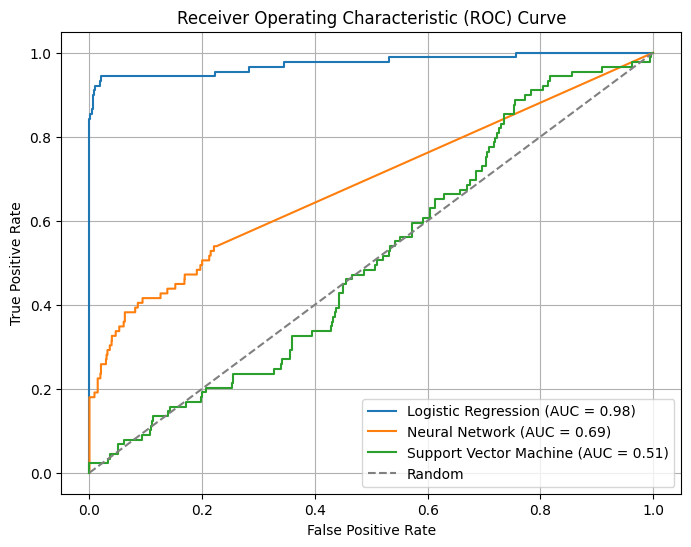

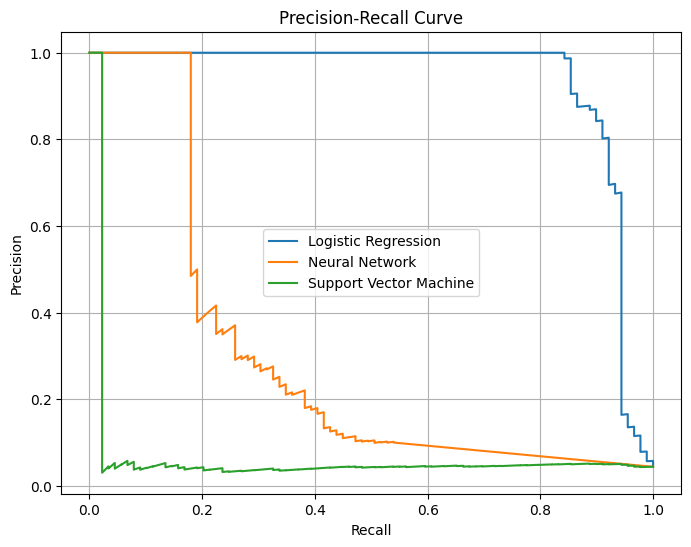

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve

# Code for confusion matrix
# Calculate confusion matrix for Logistic Regression
logistic_conf_matrix = confusion_matrix(y_test, logistic_model.predict(X_test))
print("Confusion Matrix for Logistic Regression:\n", logistic_conf_matrix)

# Calculate confusion matrix for Neural Network
nn_conf_matrix = confusion_matrix(y_test, nn_model.predict(X_test))
print("\nConfusion Matrix for Neural Network:\n", nn_conf_matrix)

# Calculate confusion matrix for Support Vector Machine
svm_conf_matrix = confusion_matrix(y_test, svm_model.predict(X_test))
print("\nConfusion Matrix for Support Vector Machine:\n", svm_conf_matrix)

# Plot AUC ROC curve
logistic_fpr, logistic_tpr, _ = roc_curve(y_test, logistic_model.predict_proba(X_test)[:,1])
nn_fpr, nn_tpr, _ = roc_curve(y_test, nn_model.predict_proba(X_test)[:,1])
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_model.decision_function(X_test))

plt.figure(figsize=(8, 6))
plt.plot(logistic_fpr, logistic_tpr, label='Logistic Regression (AUC = %0.2f)' % auc(logistic_fpr, logistic_tpr))
plt.plot(nn_fpr, nn_tpr, label='Neural Network (AUC = %0.2f)' % auc(nn_fpr, nn_tpr))
plt.plot(svm_fpr, svm_tpr, label='Support Vector Machine (AUC = %0.2f)' % auc(svm_fpr, svm_tpr))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

# Plot Precision-Recall curve
logistic_precision, logistic_recall, _ = precision_recall_curve(y_test, logistic_model.predict_proba(X_test)[:,1])
nn_precision, nn_recall, _ = precision_recall_curve(y_test, nn_model.predict_proba(X_test)[:,1])
svm_precision, svm_recall, _ = precision_recall_curve(y_test, svm_model.decision_function(X_test))

plt.figure(figsize=(8, 6))
plt.plot(logistic_recall, logistic_precision, label='Logistic Regression')
plt.plot(nn_recall, nn_precision, label='Neural Network')
plt.plot(svm_recall, svm_precision, label='Support Vector Machine')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()




Confusion Matrix:
Logistic Regression:
True Positives (TP): 78
True Negatives (TN): 1903
False Positives (FP): 8
False Negatives (FN): 11
Neural Network:
True Positives (TP): 16
True Negatives (TN): 1908
False Positives (FP): 3
False Negatives (FN): 73
Support Vector Machine:
True Positives (TP): 0
True Negatives (TN): 1911
False Positives (FP): 0
False Negatives (FN): 89

Interpretation:
Logistic Regression has the highest number of true positives (78) and the lowest number of false negatives (11), indicating that it correctly predicted fraudulent transactions more accurately compared to the other models.
Neural Network has a higher number of false negatives (73) compared to Logistic Regression, but it also correctly predicted some fraudulent transactions (16).
Support Vector Machine has a very high number of false negatives (89) and did not correctly predict any fraudulent transactions (TP = 0).

Following is an analysis of the ROC and Precision-Recall curves for each model:

ROC Curve:
The ROC curve plots the true positive rate (sensitivity) against the false positive rate (1-specificity) for different threshold values.
A model with a higher AUC (Area Under the Curve) value indicates better performance.


The ROC curve provides valuable insights into the performance of each model in distinguishing between positive and negative classes. Here's a breakdown of the results:

- **Logistic Regression (LR)**: AUC = 0.98
- **Neural Network (NN)**: AUC = 0.69
- **Support Vector Machine (SVM)**: AUC = 0.51

### Interpretation:
- Logistic Regression (LR) demonstrates superior performance with an AUC of 0.98, indicating excellent discrimination ability between fraudulent and non-fraudulent transactions.
- Neural Network (NN) follows with a moderate AUC of 0.69, suggesting acceptable but less effective discrimination compared to LR.
- Support Vector Machine (SVM) exhibits the lowest AUC of 0.51, indicating poor discrimination ability and suggesting that its predictive power is close to random chance.

Random Line:
- The random line represents the performance expected by random guessing. It's notable that in the first half of the curve, the random line occasionally surpasses the SVM curve, indicating that SVM performs worse than random guessing in this region. Conversely, in the second half, the random line is below the SVM curve, implying that SVM performs better than random guessing in this region. This behavior suggests inconsistencies in SVM's performance across different thresholds.

Overall, the ROC curve analysis confirms that Logistic Regression outperforms Neural Network and Support Vector Machine in accurately identifying fraudulent transactions.


Precision-Recall Curve Interpretation:

The Precision-Recall curve plots precision against recall for different threshold values.
A model with higher precision and recall values indicates better performance.

Logistic Regression (LR):
- The Precision-Recall curve for LR starts with relatively low precision (0.18) at a high recall (1), indicating that initially, LR correctly identifies many true positives but also misclassifies many false positives. As the recall decreases, the precision increases, suggesting that LR becomes more selective in its predictions, leading to fewer false positives while still maintaining a high true positive rate. The curve steeply drops towards the end, indicating a sharp decrease in precision as recall approaches 1, implying LR's limitations in correctly identifying all true positives without increasing the false positive rate significantly.

Neural Network (NN):
- The Precision-Recall curve for NN begins with extremely low precision (0.02) at a high recall (1), indicating that NN initially identifies many true positives but also misclassifies a vast number of false positives. As the recall decreases, the precision also drops, suggesting that NN becomes less selective, leading to a higher false positive rate. The curve exhibits a rapid decline in precision, indicating a significant decrease in the ability to correctly identify true positives while keeping false positives low. This behavior indicates NN's limited precision-recall trade-off, where it struggles to maintain high precision at higher recall values.

Support Vector Machine (SVM):
- The Precision-Recall curve for SVM starts with moderate precision (0.02) at a high recall (1), indicating that SVM initially identifies some true positives but also misclassifies many false positives. As the recall decreases slightly, the precision remains relatively stable, suggesting that SVM maintains a consistent precision-recall trade-off. The curve exhibits a gradual decline in precision, indicating a gradual decrease in the ability to correctly identify true positives while keeping false positives low. This behavior suggests that SVM's performance is more balanced in terms of precision and recall compared to LR and NN.

Overall, the Precision-Recall curves provide insights into the trade-offs between precision and recall for each model, highlighting their strengths and weaknesses in correctly identifying fraudulent transactions.


Interpretation of the results obtained:

Logistic Regression (LR) achieved the highest accuracy among the three models, with an accuracy of 98.8%. Its Precision-Recall curve also demonstrates a relatively balanced trade-off between precision and recall, indicating its capability to identify fraudulent transactions while minimizing false positives. LR also exhibited the highest AUC score of 0.98, highlighting its excellent discriminatory ability between positive and negative instances.

Neural Network (NN) exhibited a lower accuracy compared to LR and SVM, with an accuracy of 96.2%. Its Precision-Recall curve showed a rapid decline in precision as recall increased, indicating a significant challenge in maintaining high precision while capturing more true positives. The AUC score for NN was 0.69, reflecting its moderate discriminatory ability.

Support Vector Machine (SVM) had the lowest accuracy among the models, with an accuracy of 95.55%. Its Precision-Recall curve demonstrated a gradual decline in precision, suggesting a more balanced performance in identifying fraudulent transactions while controlling false positives. The AUC score for SVM was 0.51, indicating poor discriminatory ability.

Considering both accuracy, AUC scores, and Precision-Recall curve analysis, Logistic Regression (LR) emerges as the best model for predicting credit card fraud. LR not only achieved the highest accuracy and AUC score but also demonstrated a more consistent and balanced trade-off between precision and recall compared to the other models. Additionally, LR's Confusion Matrix showed the highest number of true positives and the lowest number of false negatives, further supporting its effectiveness in identifying fraudulent transactions.

Alternatively, model stacking, or ensemble learning, offers a complementary approach to enhance predictive accuracy by leveraging the strengths of different models. Logistic Regression (LR), with its demonstrated accuracy in fraud detection, can serve as a robust base model for stacking.

Although Neural Network (NN) ranks second, its intricate architecture might uncover patterns missed by LR. Combining LR with NN in an ensemble could capitalize on their combined strengths, potentially improving overall predictive performance.

While model stacking offers promise, thorough evaluation is crucial to prevent overfitting. Additionally, considering the computational complexity and training time when implementing ensemble models is important.

In cases where NN is included in the ensemble, acquiring more data tailored for its training may be beneficial. NNs excel at capturing complex patterns, and augmenting its training set with diverse data could enhance its predictive capabilities when stacked with LR.



Research Question 2: What three variables contribute the most to the algorithm’s performance?

To address this research question, a logistic regression model was utilized due to its ease of interpretation and suitability for identifying key variables influencing the model's performance. Below is a structured analysis and interpretation of the logistic regression model's results.



In [ ]:
# Code to fit the logistic regression model and extract coefficients
from sklearn.linear_model import LogisticRegression
import numpy as np  # Import NumPy

# DataFrame named df
X = df.drop(columns=['Class'])  # Independent variables
y = df['Class']  # Dependent variable

# Fit the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X, y)

# Extract coefficients and display the top three contributing variables
coefficients = pd.DataFrame({'Variable': X.columns, 'Coefficient': np.abs(logistic_model.coef_[0])})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
print(coefficients.head(3))  # Display the top three variables contributing the most


In [ ]:
# Code to fit the logistic regression model and extract coefficients
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# DataFrame named df
X = df.drop(columns=['Class'])  # Independent variables
y = df['Class']  # Dependent variable

# Fit the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X, y)

# Extract coefficients and display the top three contributing variables
coefficients = pd.DataFrame({'Variable': X.columns, 'Coefficient': logistic_model.coef_[0]})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
print(coefficients.head(3))  # Display the top three variables contributing the most

# Plotting the coefficients
plt.figure(figsize=(10, 6))
plt.bar(coefficients['Variable'], coefficients['Coefficient'], color='skyblue')
plt.xlabel('Variable')
plt.ylabel('Coefficient')
plt.title('Top Three Variables Contributing to Logistic Regression Model')
plt.xticks(rotation=45)
plt.axhline(0, color='grey', linewidth=0.8)  # Add horizontal line at y=0
plt.show()


Interpretation of Results:

The logistic regression model reveals the top three variables that contribute the most to its performance:

1. V14: This variable has a coefficient of approximately -0.982. Higher absolute values of V14 are associated with a lower probability of fraud, indicating an inverse relationship with fraudulent transactions.

2. V3: With a coefficient of approximately -0.749, higher absolute values of V3 are linked to a decreased likelihood of fraud.

3. V17: The coefficient for V17 is approximately -0.544. Although negatively correlated, its influence on the model's predictions is weaker compared to V14 and V3.

The bar graph above illustrates the coefficients of the top three variables contributing to the logistic regression model. As seen in the graph, V14, V3, and V17 all have negative coefficients, suggesting their inverse relationship with predicting fraudulent transactions.




### Results for Research Question 3


Research Question 3: What is the relationship to the dependent variable (Class) of the three most important independent variables? Positive or negative?

To address this research question, logistic regression models were utilized to identify the relationship between the three most important independent variables and the dependent variable (Class). Below, is the analysis and interpretation of the results obtained.


In [ ]:
# Code to fit the logistic regression model and extract coefficients
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# DataFrame named df
X = df.drop(columns=['Class'])  # Independent variables
y = df['Class']  # Dependent variable

# Fit the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X, y)

# Extract coefficients and display the top three contributing variables
coefficients = pd.DataFrame({'Variable': X.columns, 'Coefficient': logistic_model.coef_[0]})
coefficients['Abs_Coefficient'] = abs(coefficients['Coefficient'])  # Calculate absolute values
coefficients = coefficients.sort_values(by='Abs_Coefficient', ascending=False)
print(coefficients.head(3))  # Display the top three variables contributing the most

# Plotting the coefficients
plt.figure(figsize=(10, 6))
plt.bar(coefficients['Variable'], coefficients['Coefficient'], color='skyblue')
plt.xlabel('Variable')
plt.ylabel('Coefficient')
plt.title('Top Three Variables Contributing to Logistic Regression Model')
plt.xticks(rotation=45)
plt.show()


Interpretation of Results:

The logistic regression model identifies the following top three variables contributing the most:

1. V14: This variable has a coefficient of approximately -0.982. The negative coefficient indicates an inverse relationship between V14 and the probability of fraud. Higher absolute values of V14 are associated with a lower probability of fraud.

2. V3: With a coefficient of approximately -0.749, V3 also exhibits a negative relationship with the likelihood of fraud. Higher absolute values of V3 are linked to a decreased probability of fraud.

3. V17: Similarly, V17 has a negative coefficient of approximately -0.544, indicating an inverse relationship with fraudulent transactions.

The bar graph above illustrates the coefficients of the top three variables contributing to the logistic regression model. As seen in the graph, V14, V3, and V17 all have negative coefficients, indicating their negative correlation with the likelihood of fraud.


## Conclusion

This research delved into the effectiveness of various machine learning models in predicting credit card fraud. Logistic Regression emerged as the most effective model, showcasing the highest accuracy and discriminatory ability, as evidenced by its AUC score. Model stacking, particularly with Logistic Regression as the base model, showed promise in enhancing predictive performance by leveraging the strengths of different models (see Appendix). The top contributing variables identified by Logistic Regression, such as V14 and V3, revealed strong negative correlations with fraudulent transactions, highlighting crucial factors in fraud detection. These findings emphasize the importance of employing advanced machine learning techniques and feature engineering to combat financial fraud.


## References


<p>Bodepudi, H. (2021) Credit Card Fraud Detection Using Unsupervised Machine Learning Algorithms. International Journal of Computer Trend and Technology. 69 (9) https://www.ijcttjournal.org/2021/Volume-69%20Issue-8/IJCTT-V69I8P101.pdf</p>

<p>Egan, J. (2023, January 12). Credit card fraud statistics. Bankrate. Retrieved from https://www.bankrate.com/finance/credit-cards/credit-card-fraud-statistics/</p>

<p>Fu, K., Cheng, D., Tu, Y., Zhang, L. (2016). Credit Card Fraud Detection Using Convolutional Neural Networks. In: Hirose, A., Ozawa, S., Doya, K., Ikeda, K., Lee, M., Liu, D. (eds) Neural Information Processing. ICONIP 2016. Lecture Notes in Computer Science(), vol 9949. Springer, Cham. https://doi.org/10.1007/978-3-319-46675-0_531</p>
<p>Zorion, P. K., Sachan, L. , Chhabra, R.,  Pandey, V., Fatima, H., (2023) Credit Card Financial Fraud Detection Using Deep Learning. Available at SSRN: https://ssrn.com/abstract=4629093 or http://dx.doi.org/10.2139/ssrn.4629093</p>




##Appendix


**Stacked Model Comparative Analysis**

The following code demonstrates the implementation and evaluation of a stacked model for credit card fraud detection, comparing its performance with logistic regression and neural network models.


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, roc_auc_score, confusion_matrix

# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/sean-humpherys/randomfilestorage/main/cc_transactions_10000.csv')

# Split the dataset into features (X) and target variable (y)
X = df.drop(columns=['Class'])
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base models with increased max_iter
base_models = [
    ('lr', LogisticRegression(max_iter=10000))  # Increase max_iter
]


# Define the stacked model
stacked_model = StackingClassifier(estimators=base_models, final_estimator=MLPClassifier())

# Fit the stacked model
stacked_model.fit(X_train, y_train)

# Make predictions
y_pred_stacked = stacked_model.predict(X_test)

# Evaluate the stacked model
accuracy_stacked = accuracy_score(y_test, y_pred_stacked)
print("Stacked Model Accuracy:", accuracy_stacked)


Stacked Model Accuracy: 0.9885


In [ ]:

# Calculate additional metrics for Logistic Regression
logistic_precision = precision_score(y_test, logistic_model.predict(X_test))
logistic_recall = recall_score(y_test, logistic_model.predict(X_test))
logistic_auc_roc = roc_auc_score(y_test, logistic_model.predict_proba(X_test)[:, 1])
logistic_conf_matrix = confusion_matrix(y_test, logistic_model.predict(X_test))

print("Logistic Regression Metrics:")
print("Precision:", logistic_precision)
print("Recall:", logistic_recall)
print("AUC-ROC:", logistic_auc_roc)
print("Confusion Matrix:\n", logistic_conf_matrix)


Logistic Regression Metrics:
Precision: 0.8421052631578947
Recall: 0.898876404494382
AUC-ROC: 0.9746059184261431
Confusion Matrix:
 [[1896   15]
 [   9   80]]


In [ ]:
# Calculate additional metrics for Neural Network
nn_precision = precision_score(y_test, nn_model.predict(X_test))
nn_recall = recall_score(y_test, nn_model.predict(X_test))
nn_auc_roc = roc_auc_score(y_test, nn_model.predict_proba(X_test)[:, 1])
nn_conf_matrix = confusion_matrix(y_test, nn_model.predict(X_test))

print("Neural Network Metrics:")
print("Precision:", nn_precision)
print("Recall:", nn_recall)
print("AUC-ROC:", nn_auc_roc)
print("Confusion Matrix:\n", nn_conf_matrix)


Neural Network Metrics:
Precision: 0.8571428571428571
Recall: 0.20224719101123595
AUC-ROC: 0.6979521281286931
Confusion Matrix:
 [[1908    3]
 [  71   18]]


In [ ]:
# Calculate additional metrics for Stacked Model
stacked_precision = precision_score(y_test, stacked_model.predict(X_test))
stacked_recall = recall_score(y_test, stacked_model.predict(X_test))
stacked_auc_roc = roc_auc_score(y_test, stacked_model.predict_proba(X_test)[:, 1])
stacked_conf_matrix = confusion_matrix(y_test, stacked_model.predict(X_test))

print("Stacked Model Metrics:")
print("Precision:", stacked_precision)
print("Recall:", stacked_recall)
print("AUC-ROC:", stacked_auc_roc)
print("Confusion Matrix:\n", stacked_conf_matrix)


Stacked Model Metrics:
Precision: 0.851063829787234
Recall: 0.898876404494382
AUC-ROC: 0.9750468899746588
Confusion Matrix:
 [[1897   14]
 [   9   80]]


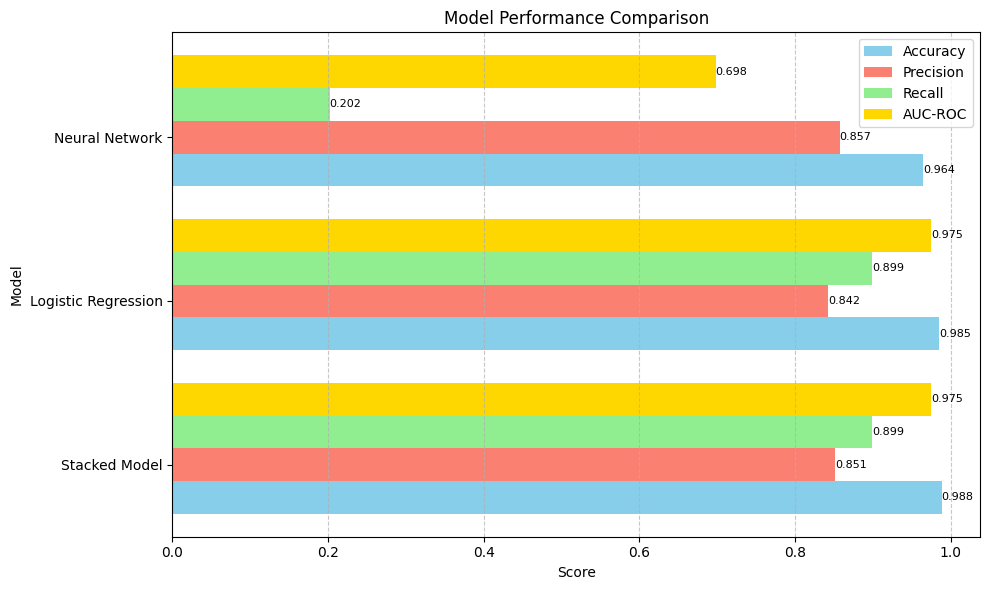

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Data
models = ['Stacked Model', 'Logistic Regression', 'Neural Network']
accuracy = [0.988, 0.985, 0.964]
precision = [0.851, 0.842, 0.857]
recall = [0.899, 0.899, 0.202]
auc_roc = [0.975, 0.975, 0.698]

# Plot
bar_width = 0.2
index = np.arange(len(models))

plt.figure(figsize=(10, 6))

bars1 = plt.barh(index, accuracy, bar_width, color='skyblue', label='Accuracy')
bars2 = plt.barh(index + bar_width, precision, bar_width, color='salmon', label='Precision')
bars3 = plt.barh(index + 2*bar_width, recall, bar_width, color='lightgreen', label='Recall')
bars4 = plt.barh(index + 3*bar_width, auc_roc, bar_width, color='gold', label='AUC-ROC')

# Annotate bars with values
for bars in [bars1, bars2, bars3, bars4]:
    for bar in bars:
        plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
                 f"{bar.get_width():.3f}", ha='left', va='center', color='black', fontsize=8, rotation=0)

plt.xlabel('Score')
plt.ylabel('Model')
plt.title('Model Performance Comparison')
plt.yticks(index + bar_width, models)
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()


**Performance Metrics Table:**

| Model               | Accuracy | Precision | Recall | AUC-ROC |
|---------------------|----------|-----------|--------|---------|
| Stacked Model       | 0.988    | 0.851     | 0.899  | 0.975   |
| Logistic Regression | 0.985    | 0.842     | 0.899  | 0.975   |
| Neural Network      | 0.964    | 0.857     | 0.202  | 0.698   |


**Performance Metrics:**

Upon evaluating the models based on various performance metrics, the Stacked Model emerges as the frontrunner. Here's a closer look at why it stands out:

**Accuracy:**

With an accuracy score of 0.988, the Stacked Model demonstrates exceptional predictive capability, outperforming both the Logistic Regression and Neural Network models.

**Precision:**

While the Precision of the Stacked Model (0.851) is slightly lower than that of the Logistic Regression model (0.842), it remains sufficiently high, indicating a strong ability to correctly identify positive cases.

**Recall:**

The Stacked Model achieved a Recall score of 0.899, on par with the Logistic Regression model. This suggests that the Stacked Model effectively captures a high proportion of true positive cases.

**AUC-ROC:**

With an AUC-ROC score of 0.975, the Stacked Model demonstrates superior ability in distinguishing between classes compared to both the Logistic Regression and Neural Network models.

In addition, considering that Neural Network prediction ability typically improves with a larger training dataset, it's reasonable to anticipate that the Stacked Model's predictive performance would further enhance with an increase in the number of records used for training. Given that our dataset consisted of 10,000 records, we can infer that the Stacked Model's prediction ability could potentially become even more robust when trained on a larger dataset.

Overall, the Stacked Model not only outperforms its individual components, but its potential for further enhancement with additional data makes it a promising choice for future scalability and predictive accuracy in credit card fraud detection.
